In [1]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


$$H=-J\sum_{\langle ij\rangle}\sigma_i\sigma_j$$

$$\overline{m}=\frac{1}{N}\overline{\sum_i \sigma_i}$$

In [2]:
N=50             #number of lattice
T=100000         #Monte Carlo Time Steps
N1=0.1           #fraction of spin down
t=arange(0,T)    #define the time step array

In [3]:
def Ini(n1):                         #defines the initial state
    L=zeros((N,N))                   #square lattice
    for i in range(N):
        for j in range(N): 
            if rand()<=n1:
                L[i,j]=-1
            else:
                L[i,j]=1
    return L

L1=Ini(N1)
L2=Ini(1-N1)

$\Delta E$ = $E$new state − $E$old state,

$\Delta E= -J(\sigma_{new}-\sigma_{old})\sum_{nearst}= 2J\sigma_{old}\sum_{nearst}$

because $\sigma_{new}=-\sigma_{old}$


If $\Delta E \leq 0$,accept the new state

If $\Delta E \gt 0$ accept the new state with probability  $e^{-\beta \Delta E}$

In [4]:
def f(S, beta): #flip the chosen lattice point
    a = random.randint(0, N-1)
    b = random.randint(0, N-1)
    dE =  2*S[a,b]*(S[(a+1)%N,b] + S[a,(b+1)%N] + S[(a-1)%N,b] + S[a,(b-1)%N])
    if rand() < exp(-beta*dE):
        S[a,b] *= -1
    else:
        pass
    return S

In [5]:
def TS(S,beta): #define the time step process
    Sn = S.copy()
    m=zeros((T))
    m[0]=mean(Sn)
    for i in range(1,T):
        Sn=f(Sn,beta)
        m[i]=mean(Sn)
    return m

In [6]:
BJ=0.1
m1=TS(L1,BJ)
m2=TS(L2,BJ)

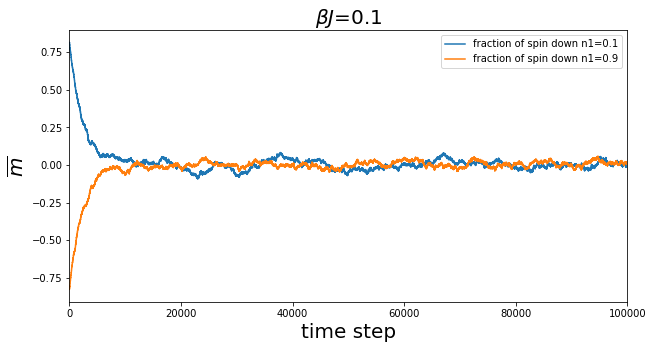

In [7]:
figure(figsize=(10,5))
plot(t,m1,label=r'fraction of spin down n1=%s'%N1)
plot(t,m2,label=r'fraction of spin down n1=%s'%(1-N1))
title(r'$\beta J$=%s'%BJ,fontsize=20)
xlabel(r'time step',fontsize=20)
ylabel(r'$\overline{m}$',fontsize=20)
xlim(0,T)
legend(loc='best')

In [8]:
BJ=0.25
m1=TS(L1,BJ)
m2=TS(L2,BJ)
t=arange(0,T)

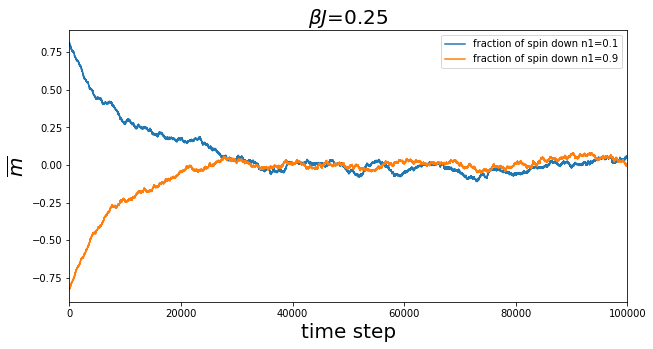

In [9]:
figure(figsize=(10,5))
plot(t,m1,label=r'fraction of spin down n1=%s'%N1)
plot(t,m2,label=r'fraction of spin down n1=%s'%(1-N1))
title(r'$\beta J$=%s'%BJ,fontsize=20)
xlabel(r'time step',fontsize=20)
ylabel(r'$\overline{m}$',fontsize=20)
xlim(0,T)
legend(loc='best')

In [10]:
BJ=1
m1=TS(L1,BJ)
m2=TS(L2,BJ)

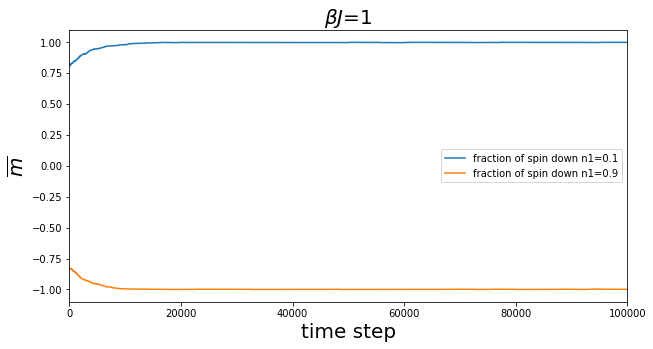

In [11]:
figure(figsize=(10,5))
plot(t,m1,label=r'fraction of spin down n1=%s'%N1)
plot(t,m2,label=r'fraction of spin down n1=%s'%(1-N1))
title(r'$\beta J$=%s'%BJ,fontsize=20)
xlabel(r'time step',fontsize=20)
ylabel(r'$\overline{m}$',fontsize=20)
xlim(0,T)
legend(loc='best')

In [12]:
BJ=arcsinh(1)/2
m1=TS(L1,BJ)
m2=TS(L2,BJ)
mTc1=mean(m1[-50000::])
mTc2=mean(m2[-50000::])

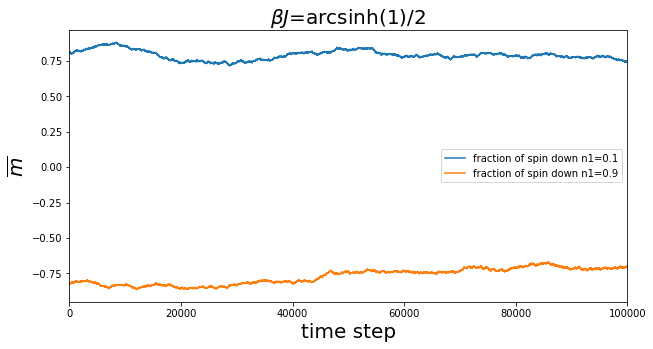

In [13]:
figure(figsize=(10,5))
plot(t,m1,label=r'fraction of spin down n1=%s'%N1)
plot(t,m2,label=r'fraction of spin down n1=%s'%(1-N1))
title(r'$\beta J$=arcsinh(1)/2',fontsize=20)
xlabel(r'time step',fontsize=20)
ylabel(r'$\overline{m}$',fontsize=20)
xlim(0,T)
legend(loc='best')

The time step that requires to reach the equilibrium is about 10000-30000, and it does not seem to depend on the initial state. Last 50000 values are used in equilibrium calculation.

In [14]:
def MB(L,Barr):
    mm=zeros((NN))
    for i in range(len(Barr)):
        MM=TS(L,Barr[i])
        mm[i]=mean(MM[-50000::])
    return mm

In [15]:
NN=30
B=linspace(0.1,2,NN) #BetaJ array
mm1=MB(L1,B)
mm2=MB(L2,B)

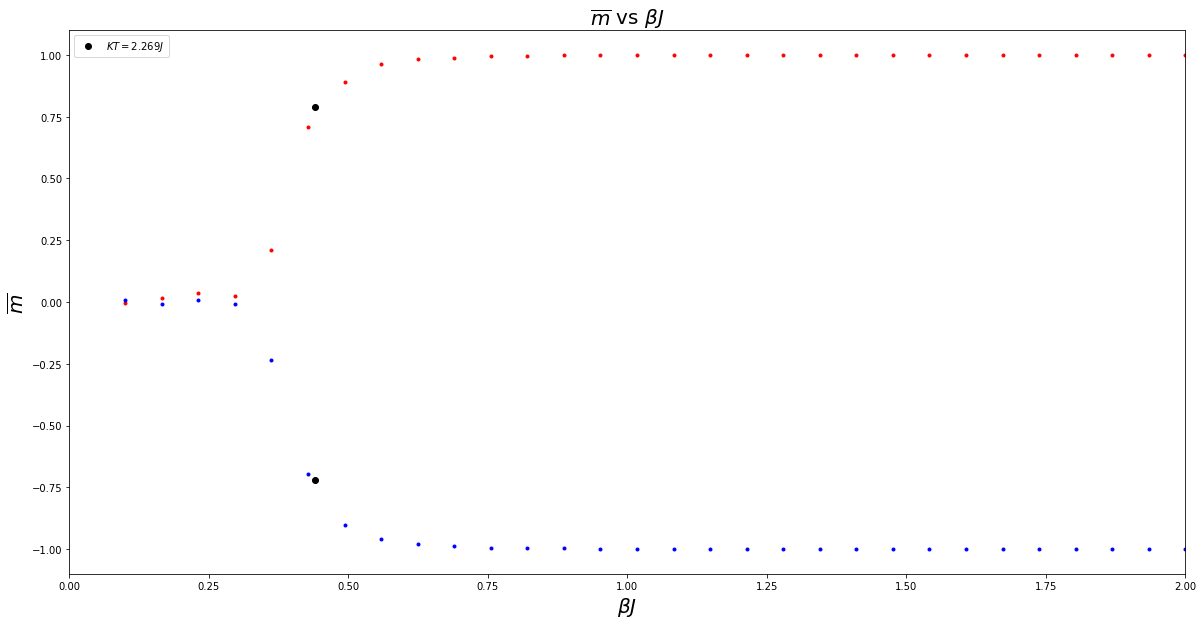

In [16]:
figure(figsize=(20,10))

plot(B,mm1,'r.')
plot(B,mm2,'b.')
plot(arcsinh(1)/2,mTc1,'ko',label=r'$KT=2.269J$')
plot(arcsinh(1)/2,mTc2,'ko')

title(r'$\overline{m}$ vs $\beta J$',fontsize=20)
xlabel(r'$\beta J$',fontsize=20)
ylabel(r'$\overline{m}$',fontsize=20)
xlim(0,max(B))
legend(loc='best')

At the critical temperature, the position of the phase translation is expected.